In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

D:\Programs\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Programs\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [29]:
plt.rcParams['figure.figsize'] = 10,6

In [3]:
data = pd.read_csv('Practical _Example.csv')

In [4]:
data
#info about the data : 
#-Satisfaction self reported by customer on a scale of 10
#-Loyalty : No widely accepted technique to measure it but there are proxies like churn rate, retention rate, or customer lifetime value(CLV).
#Loyalty here was measured on the basis of purchases made for 1y and other factors, this follows a continuous data type(range = -2.5 to 2.5) and is already standardized.

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


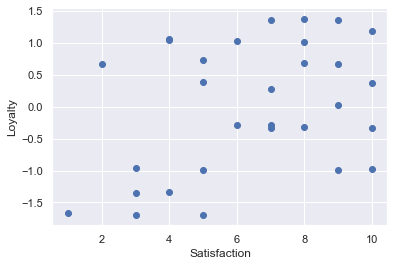

In [7]:
plt.scatter(data.Satisfaction,data.Loyalty)
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()
#if we split the graph into four differnt parts we can get:
#Low Satis - Low Loyalty
#Low Satis - High Loyalty
#High Satis - Low Loyalty
#High Satis - High Loyalty
#Looking at the graph, a two cluster solution does not seem to make much sense.

In [8]:
x = data.copy()

In [9]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
clusters = x.copy()
clusters['cluster_predic'] = kmeans.fit_predict(x)

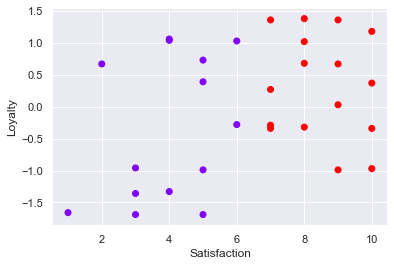

In [12]:
plt.scatter(clusters.Satisfaction,clusters.Loyalty,c=clusters.cluster_predic,cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()
#The algoraithm here only considered satisfaction as a feature since we did not standardize the variable (Satisfaction).
#Since both variables are important to us, we can fix this problem by standardizing Satisfaction variable.

In [15]:
from sklearn import preprocessing
#Standardizes with mean 0, and std dev of 1 by default, each variable,seperately.
x_scaled = preprocessing.scale(x)
x_scaled
#Remeber Loyalty here was already standardized prior to this, so it remains unchanged

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [20]:
#Lets take the elbow method to identify ideal number of clusters.
wcss = []

In [21]:
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [22]:
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.34807941029098,
 4.315662464700005,
 3.8231980448085188]

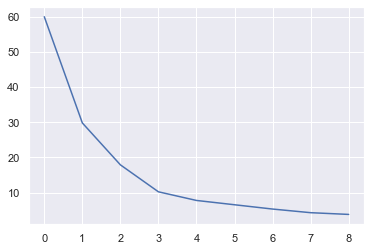

In [24]:
plt.plot(wcss)
plt.show()
#Looking at the elbow points it seems we are confused between choosing 2 or 3 or 4.
#Let's explore them all.

In [42]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_predic'] = kmeans_new.fit_predict(x_scaled)
clusters_new
#We will plot the data without standardizing the AXES but the solution will be the standardized one. 

,Satisfaction,Loyalty,cluster_predic
0,4,-1.33,0
1,6,-0.28,2
2,5,-0.99,0
3,7,-0.29,2
4,4,1.06,3
5,1,-1.66,0
6,10,-0.97,2
7,8,-0.32,2
8,8,1.02,1
9,8,0.68,1


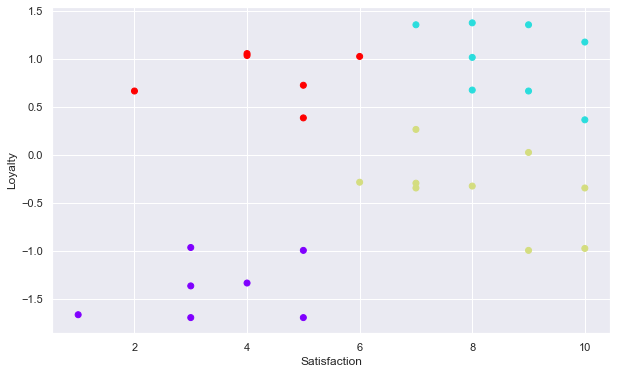

In [43]:
plt.scatter(clusters_new.Satisfaction,clusters_new.Loyalty,c=clusters_new.cluster_predic,cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()
#We often choose to plot using the original values for clearer interpretability.
#Here we can see that the customers with low satisfaction and low loyalty are aliented from the rest, it is important to name your clusters.
#In unsupervised machine learning the algorithm will do the magic but we need to interpret the result.
#In a 4 cluster solution we can name the clusters as "alienated(Low S,Low L), Supporters(Low S,High L),Fans(High S,High L),Roamers(High S,Low L).
#In a 5 cluster solution, the roamers split into 2 sub clusters.